In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_excel("./2017-2020 Data Including Apps.xlsx")

In [4]:
df.shape

(19554, 69)

In [344]:
#df.info()

In [345]:
#df.head(5).T

In [5]:
df.columns

Index(['RecordNUM', 'Period', 'TAB_APPLIED', 'TAB_ADMITTED', 'TAB_ENROLLED', 'bo_applied', 'bo_admitted', 'bo_enrollflag', 'rl_GPARating', 'rl_AcademicRating', 'rl_SuperScore_BestConcorded', 'bo_ED1', 'bo_ED2', 'bo_PathwayRecruit', 'bo_RD', 'bo_internationalstudent', 'bo_permresident', 'bo_UScitizen', 'bo_InStateResident', 'bo_TargetState1', 'bo_TargetState2', 'bo_TargetState3', 'bo_TargetState4', 'bo_TargetState5', 'bo_TargetState6', 'bo_IPEDS_AmerIndianAlaska', 'bo_IPEDS_Asian', 'bo_IPEDS_Black', 'bo_IPEDS_HawaiianPacificIslander', 'bo_IPEDS_hispanic', 'bo_IPEDS_White', 'bo_IPEDS_MultiRacial', 'bo_IPEDS_Unkown', 'bo_female', 'bo_male', 'bo_legacy', 'bo_testoptional', 'bo_FS_Stealth', 'bo_athlete', 'bo_CampusVisiPreMarch1', 'rl_TouchPointsBeforeAdmitted', 'bo_FAFSA_filer', 'bo_Profile_filer', 'rl_FM_EFC', 'rl_IM_TFC', 'rl_FM_need', 'rl_IM_need', 'rl_instaid', 'rl_tuitionrevenue', 'rl_tuitionfeesrevenue', 'rl_totalrevenue', 'rl_tuition', 'rl_tuitionfees', 'rl_roomboard',
       'rl_dir

In [7]:
duplicate_columns = ['TAB_APPLIED', 'TAB_ADMITTED', 'TAB_ENROLLED','st_Round',
       'st_Citizenship', 'st_Geography', 'st_RaceEthnicity', 'st_Gender',
       'st_Legacy', 'st_TestOptional', 'st_StealthApplicant', 'st_Athlete',
       'st_CampusVisit', 'st_FAFSAFiler', 'st_ProfileFiler','PRED_ENROLL','Submitted']

In [8]:
data = df.drop(duplicate_columns,axis=1)

In [9]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)

rl_GPARating                        0.531093
rl_AcademicRating                   0.485067
rl_FM_EFC                           0.483533
rl_IM_need                          0.450956
rl_IM_TFC                           0.450956
rl_SuperScore_BestConcorded         0.250332
rl_directCOA                        0.000000
bo_permresident                     0.000000
bo_TargetState6                     0.000000
bo_TargetState5                     0.000000
bo_TargetState4                     0.000000
bo_TargetState3                     0.000000
bo_TargetState2                     0.000000
bo_TargetState1                     0.000000
bo_InStateResident                  0.000000
bo_UScitizen                        0.000000
bo_ED2                              0.000000
bo_internationalstudent             0.000000
bo_RD                               0.000000
bo_PathwayRecruit                   0.000000
bo_IPEDS_Asian                      0.000000
bo_ED1                              0.000000
bo_enrollf

In [10]:
data.describe()

,RecordNUM,Period,bo_applied,bo_admitted,bo_enrollflag,rl_GPARating,rl_AcademicRating,rl_SuperScore_BestConcorded,bo_ED1,bo_ED2,bo_PathwayRecruit,bo_RD,bo_internationalstudent,bo_permresident,bo_UScitizen,bo_InStateResident,bo_TargetState1,bo_TargetState2,bo_TargetState3,bo_TargetState4,bo_TargetState5,bo_TargetState6,bo_IPEDS_AmerIndianAlaska,bo_IPEDS_Asian,bo_IPEDS_Black,bo_IPEDS_HawaiianPacificIslander,bo_IPEDS_hispanic,bo_IPEDS_White,bo_IPEDS_MultiRacial,bo_IPEDS_Unkown,bo_female,bo_male,bo_legacy,bo_testoptional,bo_FS_Stealth,bo_athlete,bo_CampusVisiPreMarch1,rl_TouchPointsBeforeAdmitted,bo_FAFSA_filer,bo_Profile_filer,rl_FM_EFC,rl_IM_TFC,rl_FM_need,rl_IM_need,rl_instaid,rl_tuitionrevenue,rl_tuitionfeesrevenue,rl_totalrevenue,rl_tuition,rl_tuitionfees,rl_roomboard,rl_directCOA
count,19554.000000,19554.000000,19554.0,19554.000000,19554.000000,9169.000000,10069.000000,14659.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.00000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,10099.000000,1.073600e+04,19554.000000,10736.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000,19554.000000
mean,9777.500000,2018.126317,1.0,0.323412,0.081262,3.704548,6.451187,1328.436797,0.036463,0.023115,0.018206,0.922215,0.292626,0.021479,0.685895,0.161706,0.146313,0.102537,0.035133,0.053646,0.039685,0.028230,0.000767,0.231001,0.133783,0.000921,0.165490,0.398793,0.032014,0.03723,0.538048,0.456377,0.042191,0.209778,0.491306,0.056050,0.300041,6.770328,0.516569,0.553186,34813.152589,4.214321e+04,22884.272834,50945.274776,5642.390201,2590.918738,2617.636034,3885.933569,57572.009308,57907.680270,14444.992840,73567.673110
std,5644.897918,0.834913,0.0,0.467790,0.273244,1.156995,1.895336,130.783741,0.187444,0.150274,0.133699,0.267839,0.454980,0.144978,0.464170,0.368190,0.353429,0.303360,0.184122,0.225324,0.195223,0.165632,0.027687,0.421484,0.340428,0.030327,0.371632,0.489663,0.176041,0.18933,0.498563,0.498106,0.201029,0.407161,0.499937,0.230024,0.458287,3.938822,0.499738,0.497176,72627.985010,6.341559e+05,31166.961163,25696.798907,15057.351289,11327.653850,11397.224339,14943.125453,1809.565561,1846.982331,362.010516,2208.562957
min,1.000000,2017.000000,1.0,0.000000,0.000000,1.000000,1.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,400.000000,-11955.000000,-11570.000000,0.000000,55130.000000,55430.000000,13945.000000,70590.000000
25%,4889.250000,2017.000000,1.0,0.000000,0.000000,3.000000,5.000000,1260.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,290.000000,2.843500e+03,0.000000,35607.750000,400.000000,0.000000,0.000000,0.000000,55130.000000,55430.000000,13945.000000,70590.000000
50%,9777.500000,2018.000000,1.0,0.000000,0.000000,4.000000,6.000000,1340.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,11778.000000,1.434700e+04,0.000000,60743.000000,400.000000,0.000000,0.000000,0.000000,57300.000000,57600.000000,14415.000000,

In [11]:
#(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)
cols=['rl_GPARating','rl_AcademicRating','rl_FM_EFC','rl_IM_need','rl_IM_TFC','rl_SuperScore_BestConcorded']
for col in cols:
    data[col] = data[col].fillna(data[col].mean())

In [12]:
useless_cols=['rl_tuitionrevenue', 'rl_tuitionfeesrevenue', 'rl_totalrevenue', 'rl_tuition', 'rl_tuitionfees', 
              'rl_roomboard','rl_directCOA']
data.drop(useless_cols,axis=1,inplace=True)

In [13]:
data.columns

Index(['RecordNUM', 'Period', 'bo_applied', 'bo_admitted', 'bo_enrollflag', 'rl_GPARating', 'rl_AcademicRating', 'rl_SuperScore_BestConcorded', 'bo_ED1', 'bo_ED2', 'bo_PathwayRecruit', 'bo_RD', 'bo_internationalstudent', 'bo_permresident', 'bo_UScitizen', 'bo_InStateResident', 'bo_TargetState1', 'bo_TargetState2', 'bo_TargetState3', 'bo_TargetState4', 'bo_TargetState5', 'bo_TargetState6', 'bo_IPEDS_AmerIndianAlaska', 'bo_IPEDS_Asian', 'bo_IPEDS_Black', 'bo_IPEDS_HawaiianPacificIslander', 'bo_IPEDS_hispanic', 'bo_IPEDS_White', 'bo_IPEDS_MultiRacial', 'bo_IPEDS_Unkown', 'bo_female', 'bo_male', 'bo_legacy', 'bo_testoptional', 'bo_FS_Stealth', 'bo_athlete', 'bo_CampusVisiPreMarch1', 'rl_TouchPointsBeforeAdmitted', 'bo_FAFSA_filer', 'bo_Profile_filer', 'rl_FM_EFC', 'rl_IM_TFC', 'rl_FM_need', 'rl_IM_need', 'rl_instaid'], dtype='object')

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import metrics

In [170]:
X=data.drop(['RecordNUM', 'Period','bo_enrollflag'],axis=1)
y=data['bo_enrollflag']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [172]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
y_pred_log = logreg.predict(X_test)

In [174]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [175]:
AUC_log=roc_auc_score(y_pred_log, y_test)
print('Area under curve of logistic regression classifier on test set: {:.2f}'.format(AUC_log))

Area under curve of logistic regression classifier on test set: 0.78


In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [177]:
logreg_best = LogisticRegression()
logreg_best.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_pred_logreg_best = logreg_best.predict(X_test)

In [179]:
print('Accuracy of logistic regression classifier after standardization on test set: {:.2f}'.format(logreg_best.score(X_test, y_test)))

Accuracy of logistic regression classifier after standardization on test set: 0.96


In [180]:
AUC_logreg_with_Stan=roc_auc_score(y_pred, y_test)
print('Area under curve of logistic regression classifier after standardization on test set: {:.2f}'.format(AUC_logreg_with_Stan))

Area under curve of logistic regression classifier after standardization on test set: 0.58


In [181]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier()
regr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
y_pred_rf = regr.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(regr.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.95


In [183]:
AUC_rf=roc_auc_score(y_pred_rf, y_test)
print('Area under curve of logistic regression classifier on test set: {:.2f}'.format(AUC_rf))

Area under curve of logistic regression classifier on test set: 0.92


In [122]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [123]:
regr_resampling = RandomForestClassifier()
regr_resampling.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
y_pred_rf_resam = regr_resampling.predict(X_test)
print('Accuracy of random forest classifier after resampling on test set: {:.2f}'.format(regr_resampling.score(X_test, y_test)))

Accuracy of random forest classifier after resampling on test set: 0.95


In [125]:
AUC_resampling=roc_auc_score(y_pred_rf_resam, y_test)
print('Area under curve of logistic regression classifier after resampling on test set: {:.2f}'.format(AUC_resampling))

Area under curve of logistic regression classifier after resampling on test set: 0.86


In [184]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(random_state=0)
xgb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [185]:
xgb.score(X_test, y_test)

0.9549046954904695

In [186]:
y_pred_xgb = reg.predict(X_test)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))

Accuracy of Gradient Boosting classifier on test set: 0.95


In [187]:
AUC_xgb=roc_auc_score(y_pred_xgb, y_test)
print('Area under curve of Gradient Boosting classifier on test set: {:.2f}'.format(AUC_xgb))

Area under curve of Gradient Boosting classifier on test set: 0.84


In [188]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Area under curve of logistic regression classifier on test set: {:.2f}\n'.format(AUC_log)) 


print('Accuracy of logistic regression classifier after standardization on test set: {:.2f}'.format(logreg_best.score(X_test, y_test)))
print('Area under curve of logistic regression classifier after standardization on test set: {:.2f}\n'.format(AUC_logreg_with_Stan))

print('Accuracy of random forest classifier on test set: {:.2f}'.format(regr.score(X_test, y_test)))
print('Area under curve of logistic regression classifier on test set: {:.2f}\n'.format(AUC_rf))

print('Accuracy of random forest classifier after resampling on test set: {:.2f}'.format(regr_resampling.score(X_test, y_test)))
print('Area under curve of logistic regression classifier after resampling on test set: {:.2f}\n'.format(AUC_resampling))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
print('Area under curve of Gradient Boosting classifier on test set: {:.2f}'.format(AUC_xgb))

Accuracy of logistic regression classifier on test set: 0.62
Area under curve of logistic regression classifier on test set: 0.78

Accuracy of logistic regression classifier after standardization on test set: 0.96
Area under curve of logistic regression classifier after standardization on test set: 0.58

Accuracy of random forest classifier on test set: 0.95
Area under curve of logistic regression classifier on test set: 0.92

Accuracy of random forest classifier after resampling on test set: 0.95
Area under curve of logistic regression classifier after resampling on test set: 0.86

Accuracy of Gradient Boosting classifier on test set: 0.95
Area under curve of Gradient Boosting classifier on test set: 0.84


In [189]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5

    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
 
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves')

In [190]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 20)
    plt.yticks(tick_marks, classes, size = 20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 30,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 20)
    plt.xlabel('Predicted label', size = 20)

Confusion matrix, without normalization
[[5875   26]
 [ 265  287]]


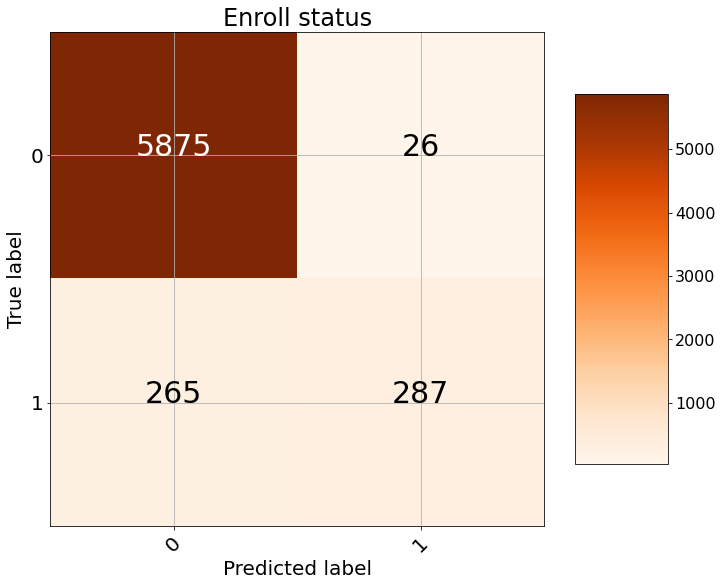

In [197]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
plot_confusion_matrix(cm, classes = ['0','1'],
                      title = 'Enroll status')

Recall Baseline: 1.0 Test: 0.51 Train: 0.99
Precision Baseline: 0.09 Test: 0.89 Train: 1.0
Roc Baseline: 0.5 Test: 0.95 Train: 1.0


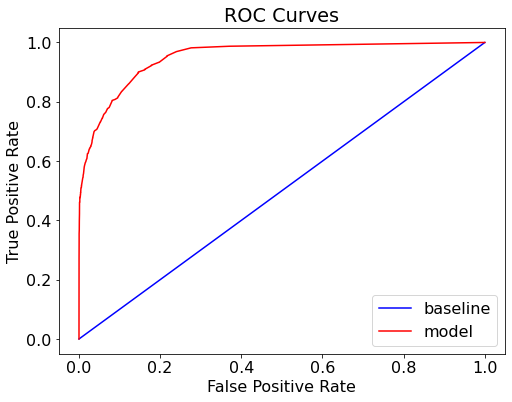

In [192]:
train_probs = regr.predict_proba(X_train)[:,1]
probs = regr.predict_proba(X_test)[:,1]
train_predictions = regr.predict(X_train)
predictions = regr.predict(X_test)
evaluate_model(predictions, probs, train_predictions, train_probs)